In [1]:
from PIL import Image
import os
import re

from skimage.feature import hog

import matplotlib.pyplot as plt
import numpy as np

import pylab as pl
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

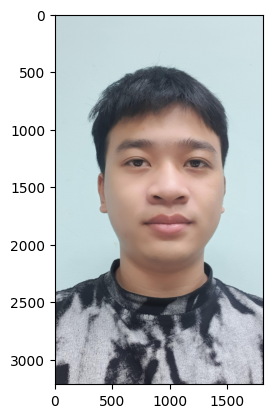

In [2]:
target_names=[ 'Ha','Minh','Thang']

# Uncomment different examples

# img = Image.open('a2_NewPhotos/Amir_21.jpg')
img = Image.open('/home/minh/Documents/project/face_recognition_pca_and_hog/data_test/Nam1.jpeg')
# img = Image.open("a2_NewPhotos/AmitabhBachan_34.jpg")
# img = Image.open('a2_NewPhotos/AnupamKher_11.jpg')      # misclassification
# img = Image.open('a2_NewPhotos/JayaBhaduri_24.jpg')


plt.imshow(img)

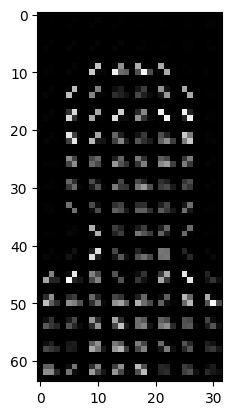

In [3]:
img=img.resize([32,64])

fd, hog_image = hog(img, orientations=9, pixels_per_cell=(4,4), cells_per_block=(2, 2), visualize=True, channel_axis=-1)
hog_image.shape
plt.imshow(hog_image, cmap='gray')

X=fd

In [4]:
X.shape

(3780,)

In [5]:

import pickle as pk
pca = pk.load(open("/home/minh/Documents/project/face_recognition_pca_and_hog/c1_PCA.pkl",'rb'))
X = np.transpose(X.reshape(-1, 1))

X_test_pca = pca.transform(X)

In [6]:

X_test_pca.shape
     

(1, 25)

In [7]:
import joblib
clf = joblib.load('/home/minh/Documents/project/face_recognition_pca_and_hog/c2_svm_classifier.pkl')
threshold=0.8

if clf.predict_proba(X_test_pca).max()>=threshold:
  y_pred=target_names[clf.predict_proba(X_test_pca).argmax()]
  prob=clf.predict_proba(X_test_pca).max()
else:
  y_pred='Unidentified'
  prob=clf.predict_proba(X_test_pca).max()

print('Identified as '+ str(y_pred)+ " with confidence "+str(round(prob*100))+ '%')

Identified as Thang with confidence 96%


In [8]:
import cv2

In [9]:
face_cascade = cv2.CascadeClassifier("/home/minh/Documents/project/face_recognition_pca_and_hog/haarcascade_frontalface_default.xml")
cam = cv2.VideoCapture(0)
while True:
    ret, frame = cam.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)        
    for (x, y, w, h) in faces:
        face_roi = gray[y:y+h, x:x+w]  # Cắt khuôn mặt
        resized = cv2.resize(face_roi, (64, 128))
        hog_features = hog(resized, orientations=9, pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)
        
        hog_features_pca = pca.transform([hog_features])  # Áp dụng PCA
        probabilities = clf.predict_proba(hog_features_pca)  # Dự đoán xác suất
        confidence = np.max(probabilities)
        label = clf.predict(hog_features_pca)[0]
        print(label)
        if confidence < 0.7:
            cv2.putText(frame, 'Unknown', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
        else:
            if (label == 0):
                cv2.putText(frame, f'Minh', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
            else:
                cv2.putText(frame, f'Thang', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    cv2.imshow('Face Recognition with Saved Model', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cam.release()
cv2.destroyAllWindows()


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/minh/Documents/project/face_recognition_pca_and_hog/face_recognition_pca_and_hog/lib/python3.12/site-packages/cv2/qt/plugins"


1
1
1
0
1
1
0
1
0
0
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
2
1
1
1
1
1
2
1
1
1
1
1
1
2
1
2
1
2
2
2
1
1
1
1
1
1
2
1
2
2
2
2
2
1
2
1
1
1
1
1
1
2
2
1
2
1
1
2
1
2
2
2
2
2
2
1
1
2
2
1
1
2
1
1
1
1
1
1
2
1
2
1
1
1
2
1
1
1
1
1
2
